# Problem Set #1
- MACS 30250, Dr. Evans 
- Name: Kento Yoshizawa (CNET: kyoshizawa) 
- Date: May the 4th be with you, 2020

## Question 1: 1D kernel density estimator

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KernelDensity
from sklearn.model_selection import GridSearchCV, LeaveOneOut

df = pd.read_csv(r'data/COVIDincubation.txt')
df.head()

,gender,age,symp_days
0,F,52.0,5.0
1,M,42.0,6.5
2,F,32.0,3.0
3,M,22.0,4.0
4,M,41.0,8.0


### (a)

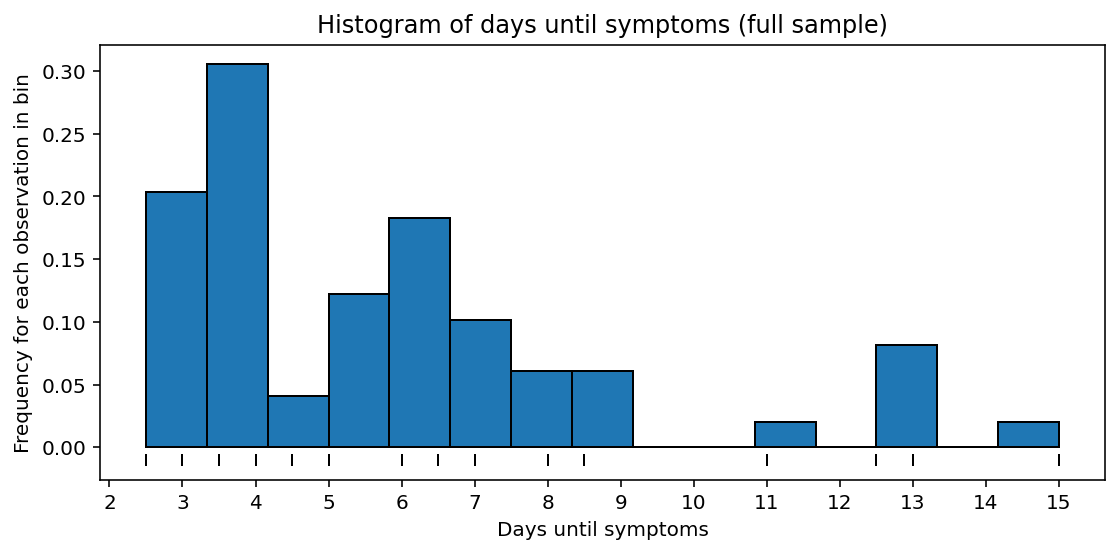

In [2]:
symp_days_tot = df['symp_days'].values
N_tot = symp_days_tot.shape[0]
num_bins = 15

fig = plt.figure(figsize=(9,4))
n_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_tot, num_bins, density=True,
                                            edgecolor='k')
plt.plot(symp_days_tot, np.full_like(symp_days_tot, -0.01), '|k', markeredgewidth=1)
plt.title(r'Histogram of days until symptoms (full sample)')
plt.xlabel(r'Days until symptoms')
plt.ylabel(r'Frequency for each observation in bin')
plt.xticks(np.arange(2,16));

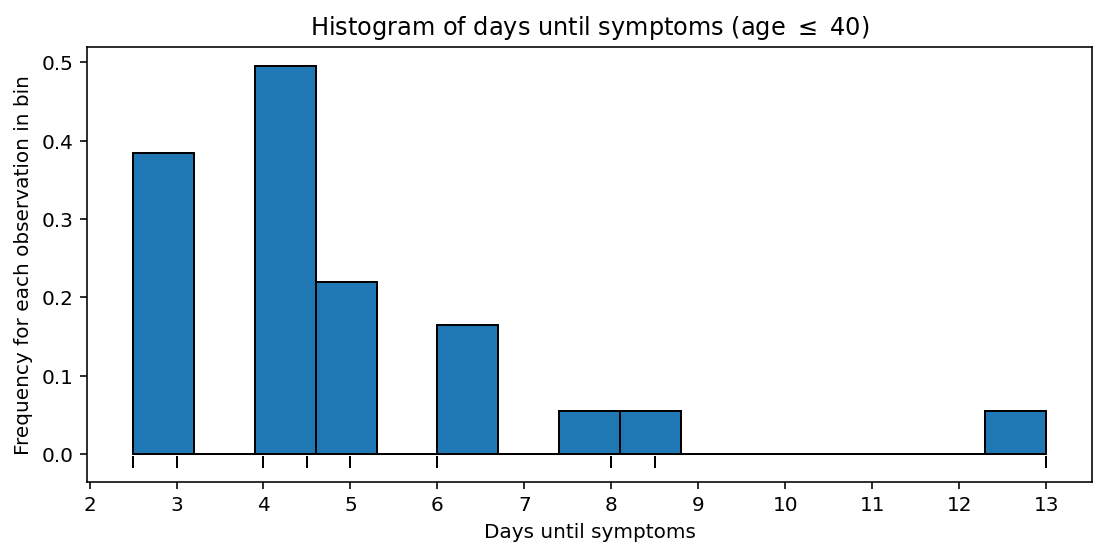

In [3]:
symp_days_young = df['symp_days'][df['age'] <= 40].values
N_young = symp_days_young.shape[0]

fig = plt.figure(figsize=(9,4))
n_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_young, num_bins, density=True,
                                            edgecolor='k')
plt.plot(symp_days_young, np.full_like(symp_days_young, -0.01), '|k', markeredgewidth=1)
plt.title(r'Histogram of days until symptoms (age $\leq$ 40)')
plt.xlabel(r'Days until symptoms')
plt.ylabel(r'Frequency for each observation in bin')
plt.xticks(np.arange(2,14));

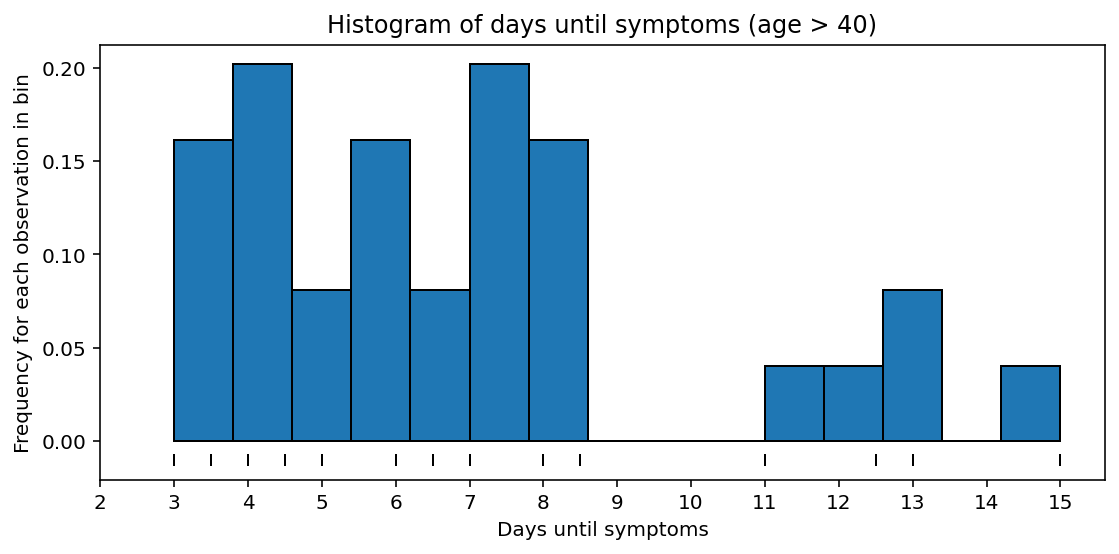

In [4]:
symp_days_old = df['symp_days'][df['age'] > 40].values
N_old = symp_days_old.shape[0]

fig = plt.figure(figsize=(9,4))
n_tot, bin_cuts_tot, patches_tot = plt.hist(symp_days_old, num_bins, density=True,
                                            edgecolor='k')
plt.plot(symp_days_old, np.full_like(symp_days_old, -0.01), '|k', markeredgewidth=1)
plt.title(r'Histogram of days until symptoms (age > 40)')
plt.xlabel(r'Days until symptoms')
plt.ylabel(r'Frequency for each observation in bin')
plt.xticks(np.arange(2,16));

### (b)

In [5]:
bandwidths = 10 ** np.linspace(-1, 1, 500)
grid_tot = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_tot.fit(symp_days_tot.reshape(N_tot, 1))
bandwidth_tot = grid_tot.best_params_['bandwidth']
print('Total sample optimal bandwidth: {0:.4f}'.format(bandwidth_tot))

Total sample optimal bandwidth: 0.8910


In [6]:
grid_young = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_young.fit(symp_days_young.reshape(N_young, 1))
bandwidth_young = grid_young.best_params_['bandwidth']
print('Young sample optimal bandwidth: {0:.4f}'.format(bandwidth_young))

Young sample optimal bandwidth: 1.6234


In [7]:
grid_old = GridSearchCV(KernelDensity(kernel='gaussian'),
                       {'bandwidth': bandwidths}, cv=LeaveOneOut())
grid_old.fit(symp_days_old.reshape(N_old, 1))
bandwidth_old = grid_old.best_params_['bandwidth']
print('Old sample optimal bandwidth: {0:.4f}'.format(bandwidth_old))

Old sample optimal bandwidth: 1.1862


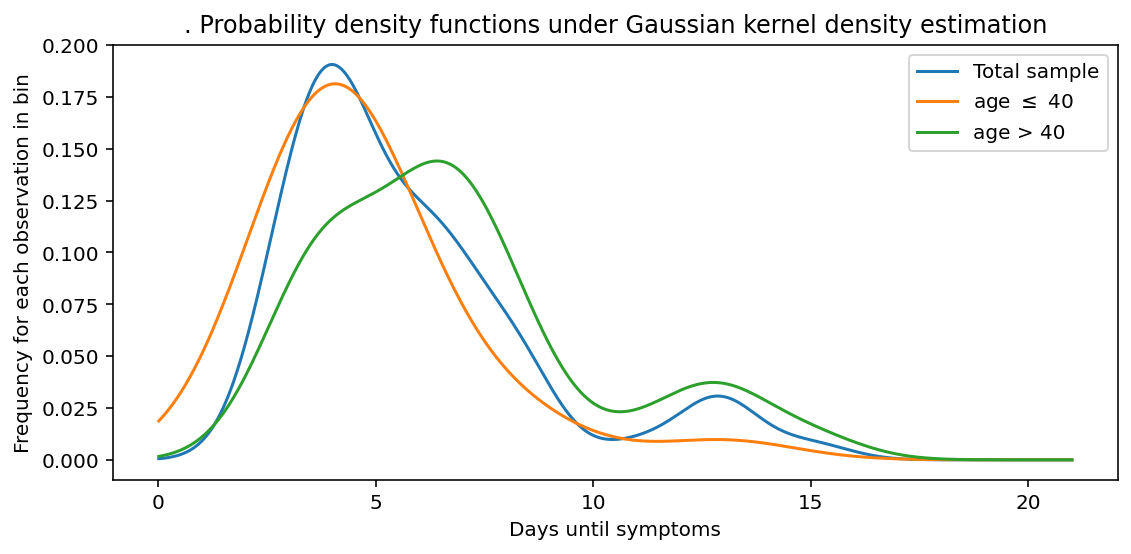

In [8]:
kde_tot = KernelDensity(bandwidth=bandwidth_tot, kernel='gaussian')
kde_tot.fit(symp_days_tot.reshape(N_tot, 1))

kde_young = KernelDensity(bandwidth=bandwidth_young, kernel='gaussian')
kde_young.fit(symp_days_young.reshape(N_young, 1))

kde_old = KernelDensity(bandwidth=bandwidth_old, kernel='gaussian')
kde_old.fit(symp_days_old.reshape(N_old, 1))

x_pts = np.linspace(0.01, 21, 1000).reshape((1000, 1))
logprob_tot   = kde_tot.score_samples(x_pts).reshape((1000, 1))
logprob_young = kde_young.score_samples(x_pts).reshape((1000, 1))
logprob_old   = kde_old.score_samples(x_pts).reshape((1000, 1))

fig = plt.figure(figsize=(9,4))
plt.plot(x_pts, np.exp(logprob_tot), label=r'Total sample')
plt.plot(x_pts, np.exp(logprob_young), label=r'age $\leq$ 40')
plt.plot(x_pts, np.exp(logprob_old), label=r'age > 40')
plt.xlabel(r'Days until symptoms')
plt.ylabel(r'Frequency for each observation in bin')
plt.title(r'. Probability density functions under Gaussian kernel density estimation')
plt.legend();

### (c)
COVID-19 incubation periods of young patients is more likely to be short (~10 days) than those of old ones.

## Question 2: 2D kernel density estimator

In [9]:
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D
#%matplotlib notebook

BQ_data = np.loadtxt('data/BQ_probmat.txt',delimiter=',')
BQ_data.shape

(73, 7)

### (a)

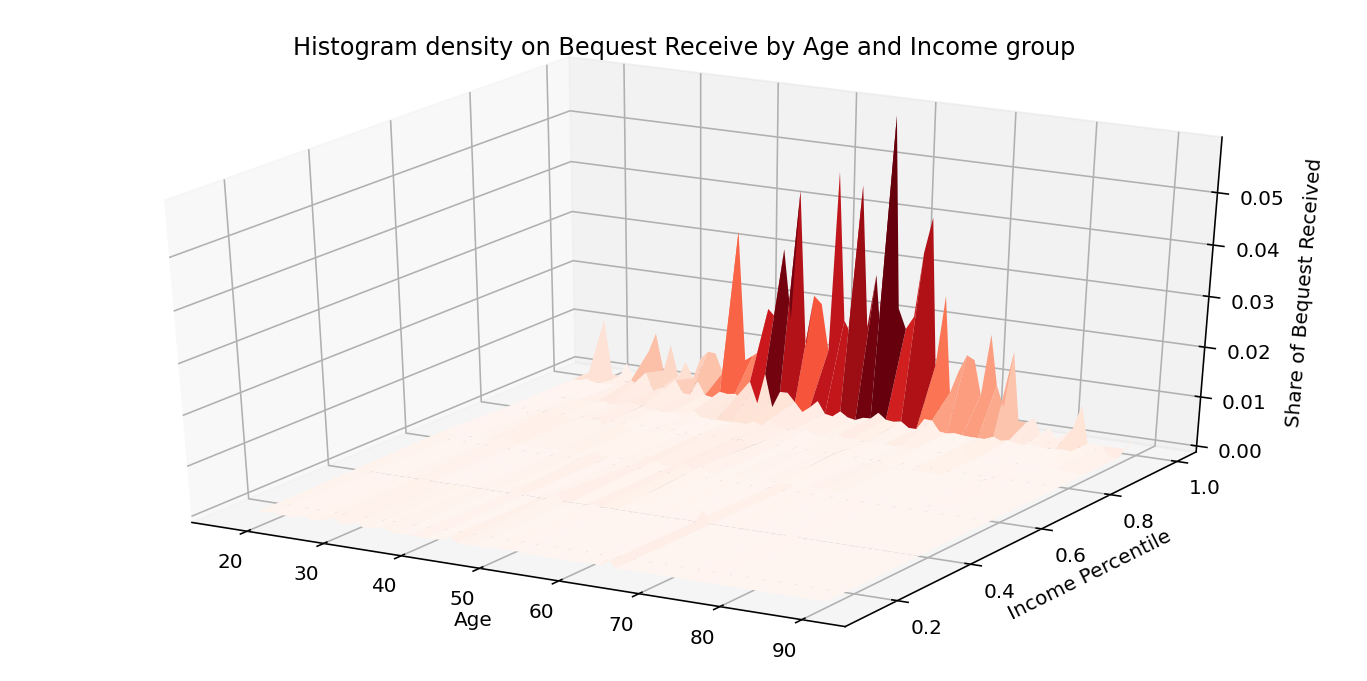

In [10]:
age_vec = np.arange(18, 91)
lambdas = np.array([0.25, 0.25, 0.20, 0.10, 0.10, 0.09, 0.01])
lambdas_mdpts = (np.cumsum(lambdas) + np.append(0, np.cumsum(lambdas))[:-1])/2
income_mat, age_mat = np.meshgrid(lambdas_mdpts, age_vec)

fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat, income_mat, BQ_data, cmap="Reds")
ax.set_title('Histogram density on Bequest Receive by Age and Income group')
ax.set_xlabel('Age')
ax.set_ylabel('Income Percentile')
ax.set_zlabel('Share of Bequest Received');

### (b)

In [11]:
BQ_ind_df = pd.read_csv('data/BQ_ind_data.txt', delimiter=',')
BQ_ind_df.head()

,age,income_pctl
0,18,0.125
1,18,0.125
2,18,0.125
3,18,0.125
4,18,0.125


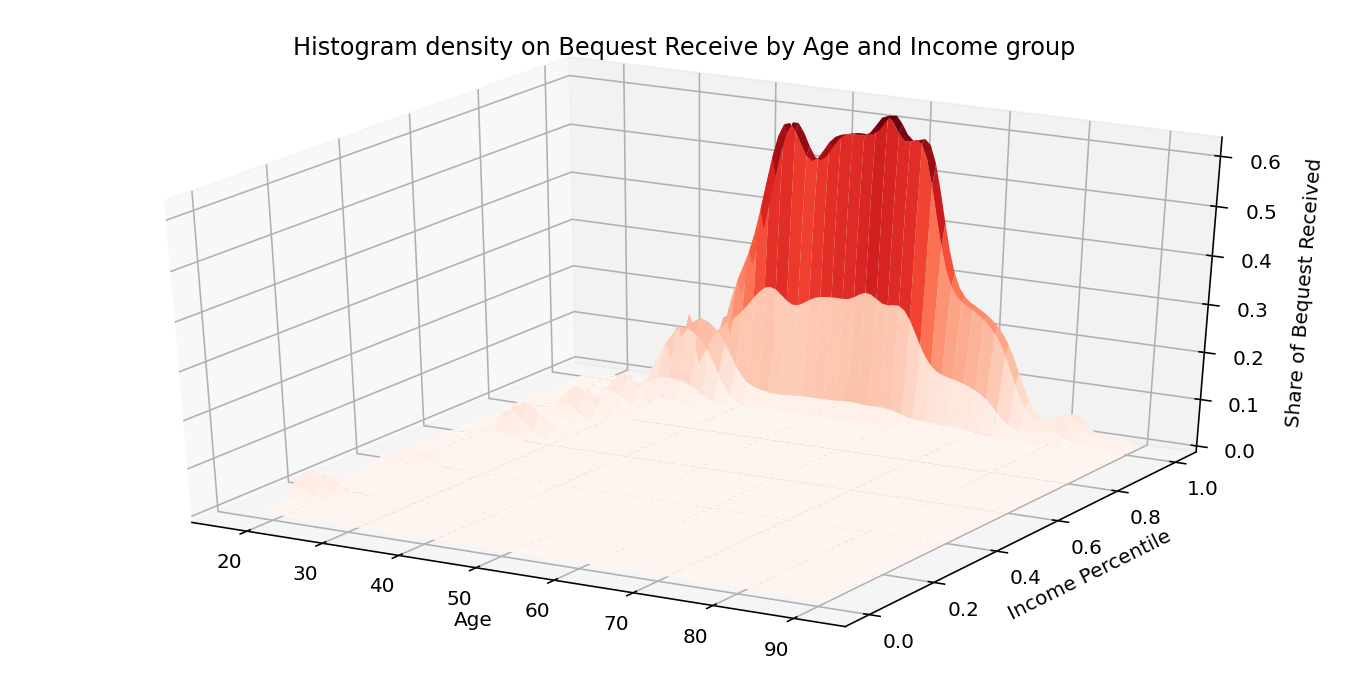

In [12]:
BQ_ind = BQ_ind_df.values
kde_density = gaussian_kde(BQ_ind.T, bw_method='silverman')
# Create a matrix 
age_mat_i, income_mat_i = np.mgrid[18:91:100j,0:1:100j]
coords = np.vstack([i.ravel() for i in [age_mat_i, income_mat_i]])
Z = np.reshape(kde_density(coords), age_mat_i.shape)


fig = plt.figure(figsize=(12,6))
ax = fig.gca(projection='3d')
ax.plot_surface(age_mat_i, income_mat_i, Z, cmap="Reds")
ax.set_title('Histogram density on Bequest Receive by Age and Income group')
ax.set_xlabel('Age')
ax.set_ylabel('Income Percentile')
ax.set_zlabel('Share of Bequest Received');

In [13]:
print('Bandwidth parameter: lambda = {0:.4f}'.format(kde_density.silverman_factor()))

Bandwidth parameter: lambda = 0.1558


I choose a bandwidth parameter $\lambda$ according to Silverman's rule. That is,

$$
\lambda = \left(\frac{n(d+2)}{4}\right)^{\frac{-1}{d+4}}
$$

where $n$ denotes the number of observations and $d$ is the number of dimensions. In this case, $n = 70,000$ and $d = 2$ then, $\lambda = 0.15576994$. Although this way is just the rule of thumb, the plot seems the estimate can capture the shape of the distribution with not too smooth and too jagged.

In [14]:
print('The estimated density for bequest recipents who are age 61 in the 6th category: {0:.4f}'\
      .format(kde_density.pdf([61, lambdas_mdpts[5]])[0]))

The estimated density for bequest recipents who are age 61 in the 6th category: 0.0161
